In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from linefit import linefit

/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:50: RuntimeWarning: invalid value encountered in scalar divide
  m = SXY / SXX
/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: invalid value encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)
/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:50: RuntimeWarning: divide by zero encountered in scalar divide
  m = SXY / SXX
/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)


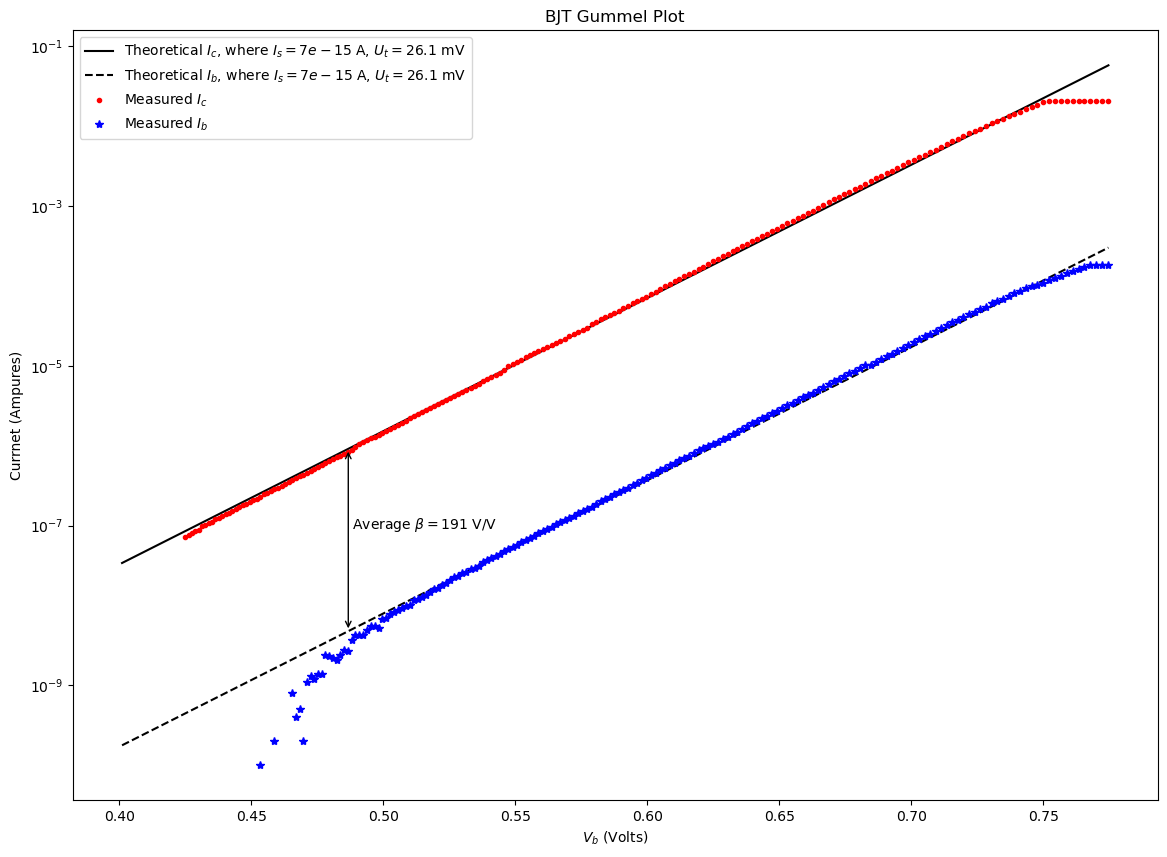

In [45]:
exp1 = pd.read_csv("lab3-exp1.csv")
exp1["current_collector"] = np.abs(exp1["current_emitter"]) - np.abs(exp1["current_base"])

exp1 = exp1[exp1["voltage_base"] < .775]

v_exp1 = exp1["voltage_base"].to_numpy()[::-1]
i_c_exp1 = exp1["current_collector"].to_numpy()[::-1]
i_b_exp1 = exp1["current_base"].to_numpy()[::-1]

first, last, mmax, bmax, Nmax = linefit(np.log(i_c_exp1), v_exp1)

u_t = mmax
i_s = 7e-15

v_b_theory = np.logspace(np.log10(.3), np.log10(np.max(exp1["voltage_base"])))
i_c_theory = i_s * np.exp(v_b_theory/u_t)

beta_est = (v_exp1 > .5) & (v_exp1 < .7)
i_c_beta_est = i_c_exp1[beta_est]
i_b_beta_est = i_b_exp1[beta_est]
beta = np.average(i_c_beta_est / i_b_beta_est)
beta = int(beta)

i_b_theory = i_c_theory / beta


plt.figure(figsize=(14,10))
plt.semilogy()

inds = v_b_theory > .4

plt.plot(v_b_theory[inds], i_c_theory[inds], "-k", label=f"Theoretical $I_c$, where $I_s={i_s}$ A, $U_t={u_t*1000:0.3}$ mV")
plt.plot(v_b_theory[inds], i_b_theory[inds], "--k", label=f"Theoretical $I_b$, where $I_s={i_s}$ A, $U_t={u_t*1000:0.3}$ mV")
plt.plot(exp1["voltage_base"], exp1["current_collector"], "r.", label="Measured $I_c$")
plt.plot(exp1["voltage_base"], exp1["current_base"], "b*", label="Measured $I_b$")

annot_ind = len(i_c_theory) // 2
plt.annotate(
    "",
    xy=(v_b_theory[annot_ind], i_b_theory[annot_ind]),
    xytext=(v_b_theory[annot_ind], beta*i_b_theory[annot_ind]),
    arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"),
    ha="center",
    va="center"
)
plt.annotate(
    f" Average $\\beta={beta}$ V/V",
    xy=(v_b_theory[annot_ind], beta/10*i_b_theory[annot_ind])
)

plt.title("BJT Gummel Plot")
plt.xlabel("$V_b$ (Volts)")
plt.ylabel("Currnet (Ampures)")

plt.legend()
plt.show()
plt.close()

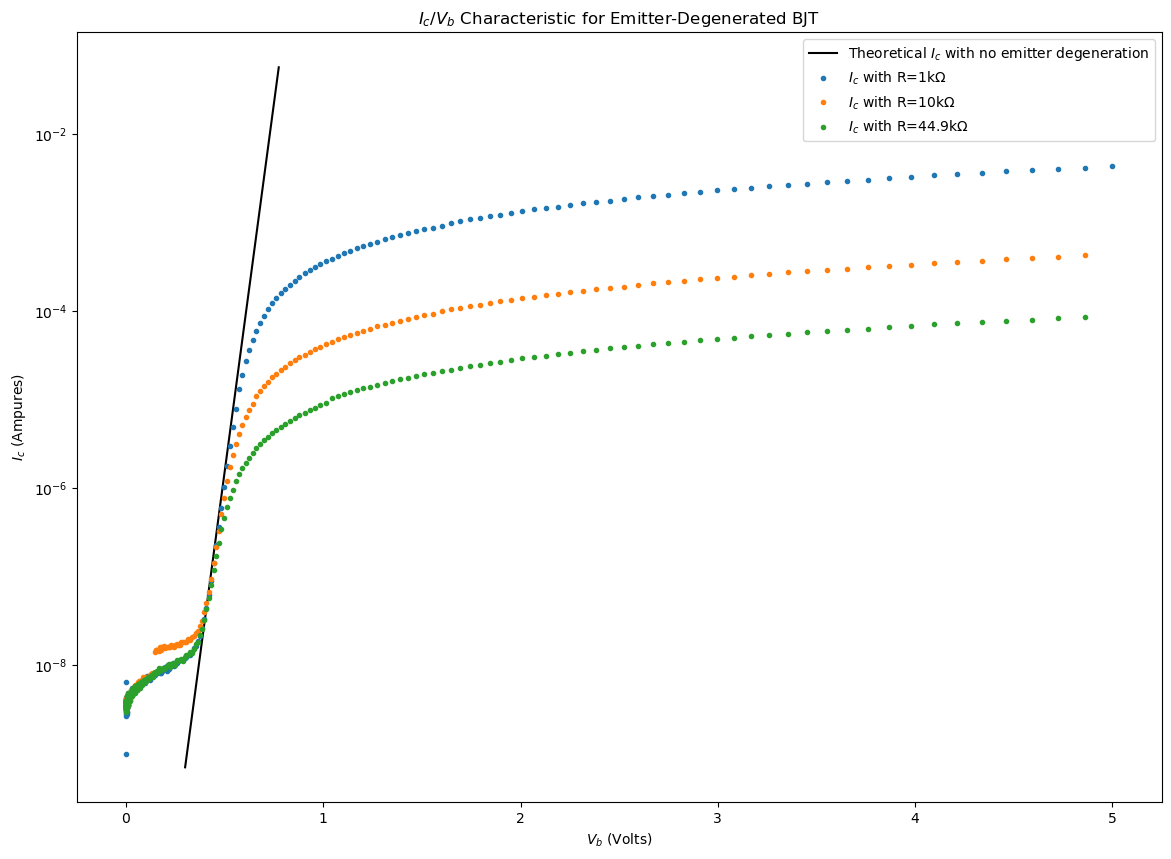

In [52]:
# exp2_100 = pd.read_csv("lab3-exp2-100.csv")
exp2_1k = pd.read_csv("lab3-exp2-1k.csv")
exp2_10k = pd.read_csv("lab3-exp2-10k.csv")
exp2_49_9k = pd.read_csv("lab3-exp2-44_9k.csv")

exp2_data = {
    # "100"  : exp2_100,
    "1k"   : exp2_1k,
    "10k"  : exp2_10k,
    "44.9k": exp2_49_9k,
}

exp2_res_map = {
    "1k": 1000,
    "10k": 10000,
    "44.9k": 44900
}

for r, df in exp2_data.items():
    df["current_collector"] = np.abs(df["current_emitter"]) - np.abs(df["current_base"])


plt.figure(figsize=(14, 10))
plt.semilogy()

plt.plot(v_b_theory, i_c_theory, "k", label="Theoretical $I_c$ with no emitter degeneration")

for r, df in exp2_data.items():
    current_collector = np.abs(df["current_emitter"]) - df["current_base"]
    plt.plot(df["voltage_base"], current_collector, ".", label=f"$I_c$ with R={r}$\Omega$")


plt.legend()
plt.xlabel("$V_b$ (Volts)")
plt.ylabel("$I_c$ (Ampures)")
plt.title("$I_c/V_b$ Characteristic for Emitter-Degenerated BJT")

plt.show()
plt.close()

/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: invalid value encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)
/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)


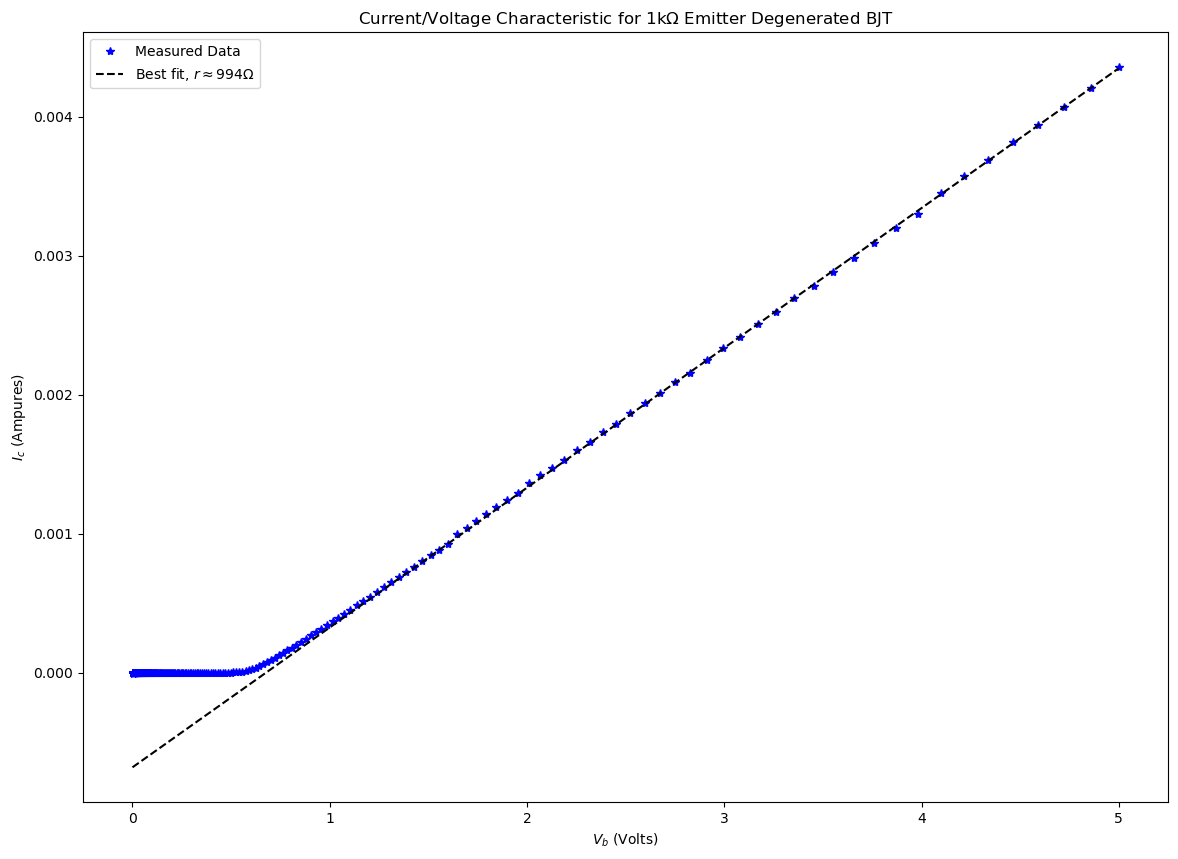

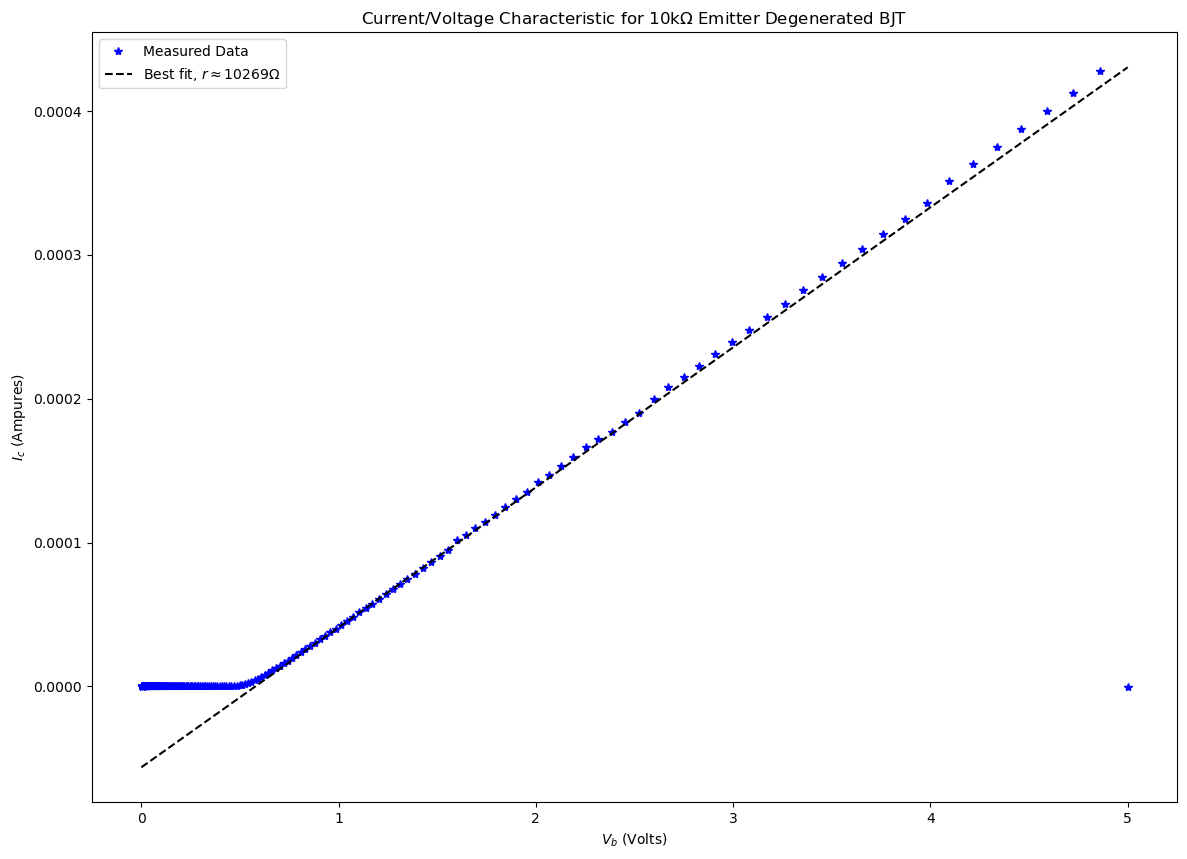

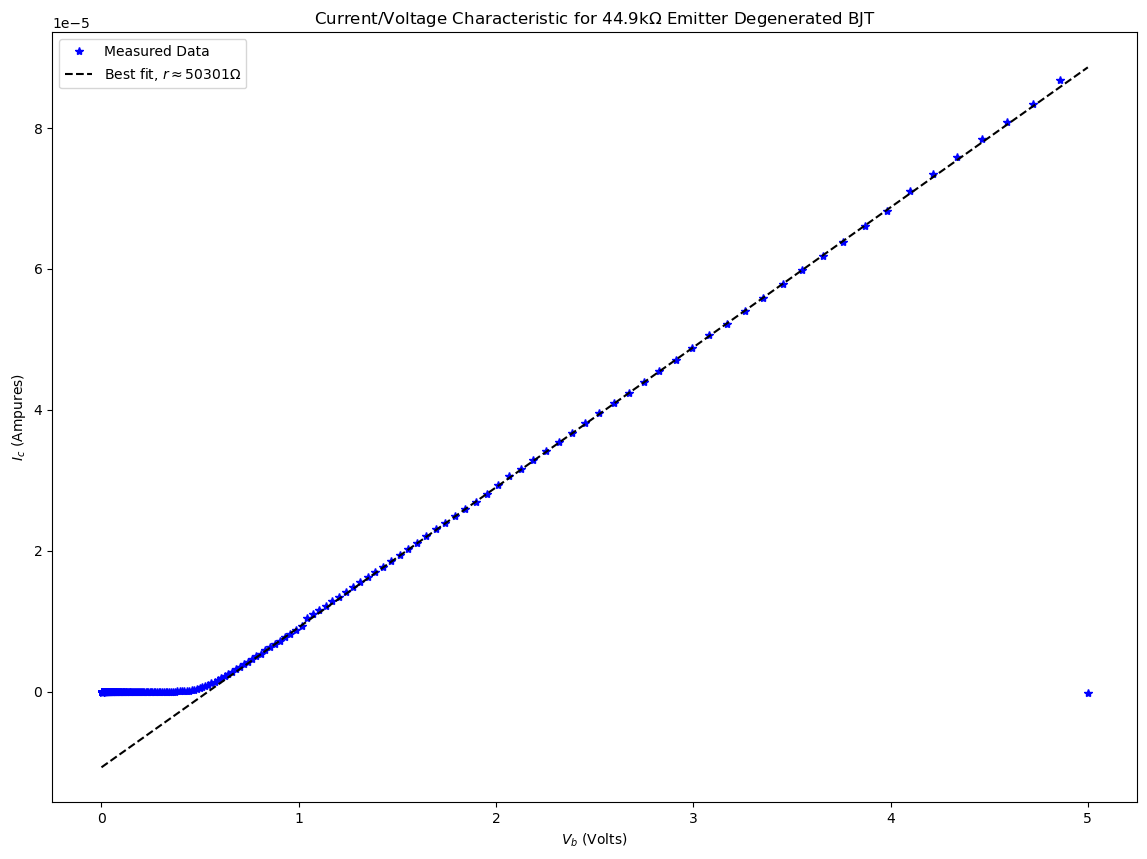

In [44]:
for r, df in exp2_data.items():
    v_b = df["voltage_base"].to_numpy()[::-1]
    i_c = df["current_collector"].to_numpy()[::-1]
    if r == "1k":
        first, last, mmax, bmax, Nmax = linefit(v_b, i_c, 1e-3)
    else:
        first, last, mmax, bmax, Nmax = linefit(v_b, i_c, 1e-4)
    v_b_fit = np.linspace(0, 5)
    i_c_fit = v_b_fit * mmax + bmax

    plt.figure(figsize=(14, 10))

    plt.plot(v_b, i_c, "b*", label="Measured Data")
    plt.plot(v_b_fit, i_c_fit, "k--", label=f"Best fit, $r\\approx{int(1/mmax)}\Omega$")


    plt.xlabel("$V_b$ (Volts)")
    plt.ylabel("$I_c$ (Ampures)")
    plt.title(f"Current/Voltage Characteristic for {r}$\Omega$ Emitter Degenerated BJT")

    plt.legend()
    plt.show()
    plt.close()


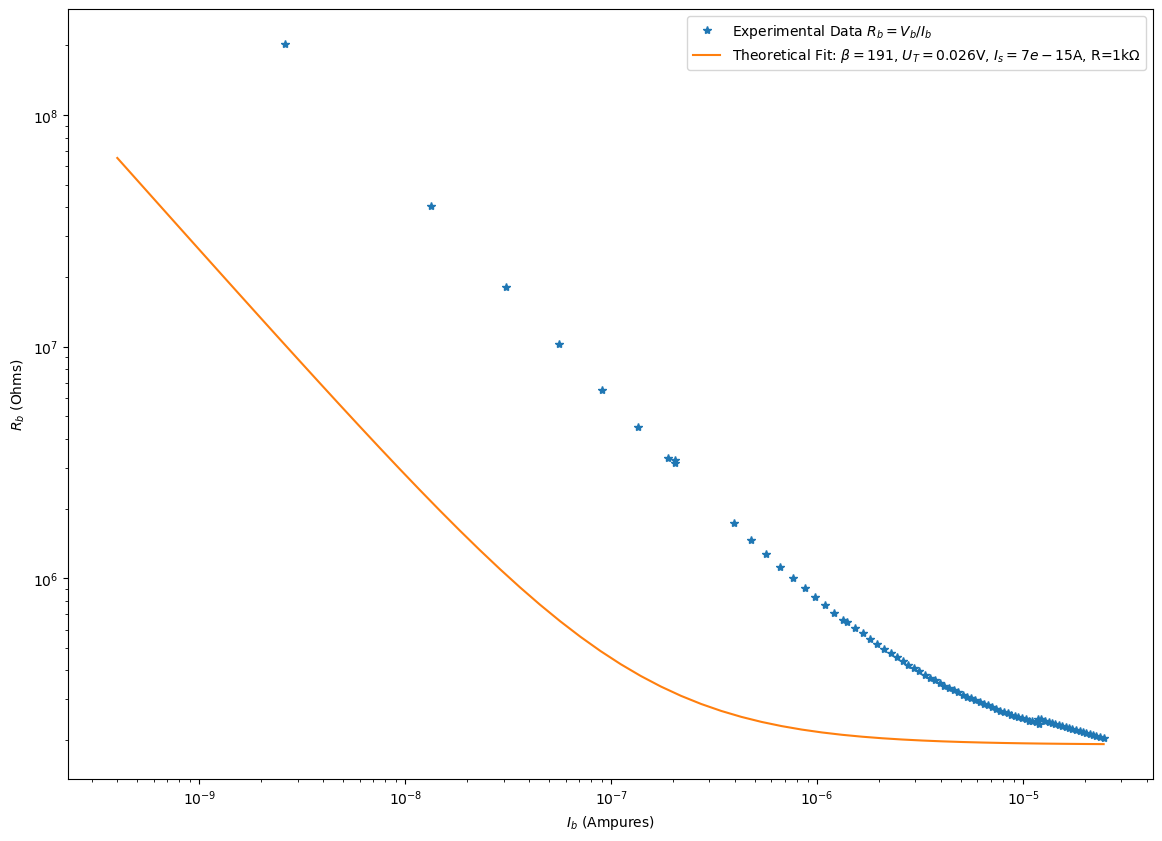

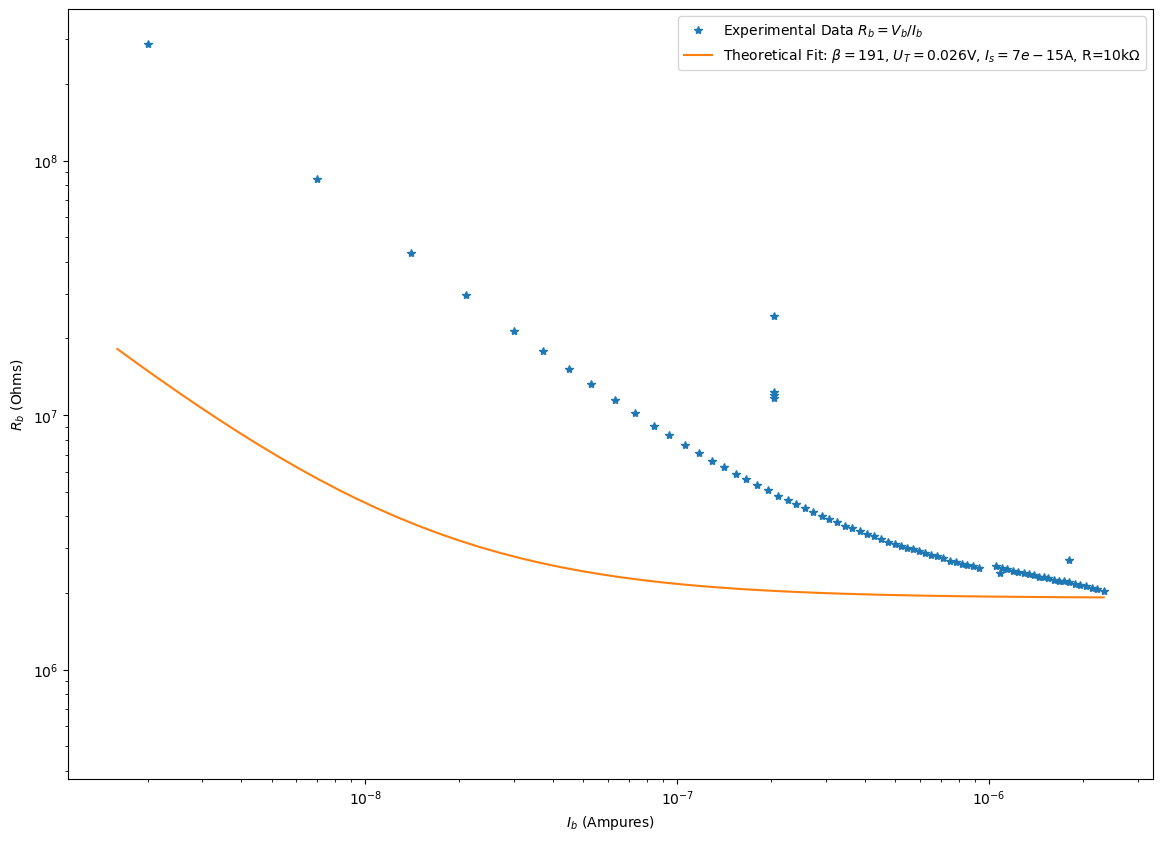

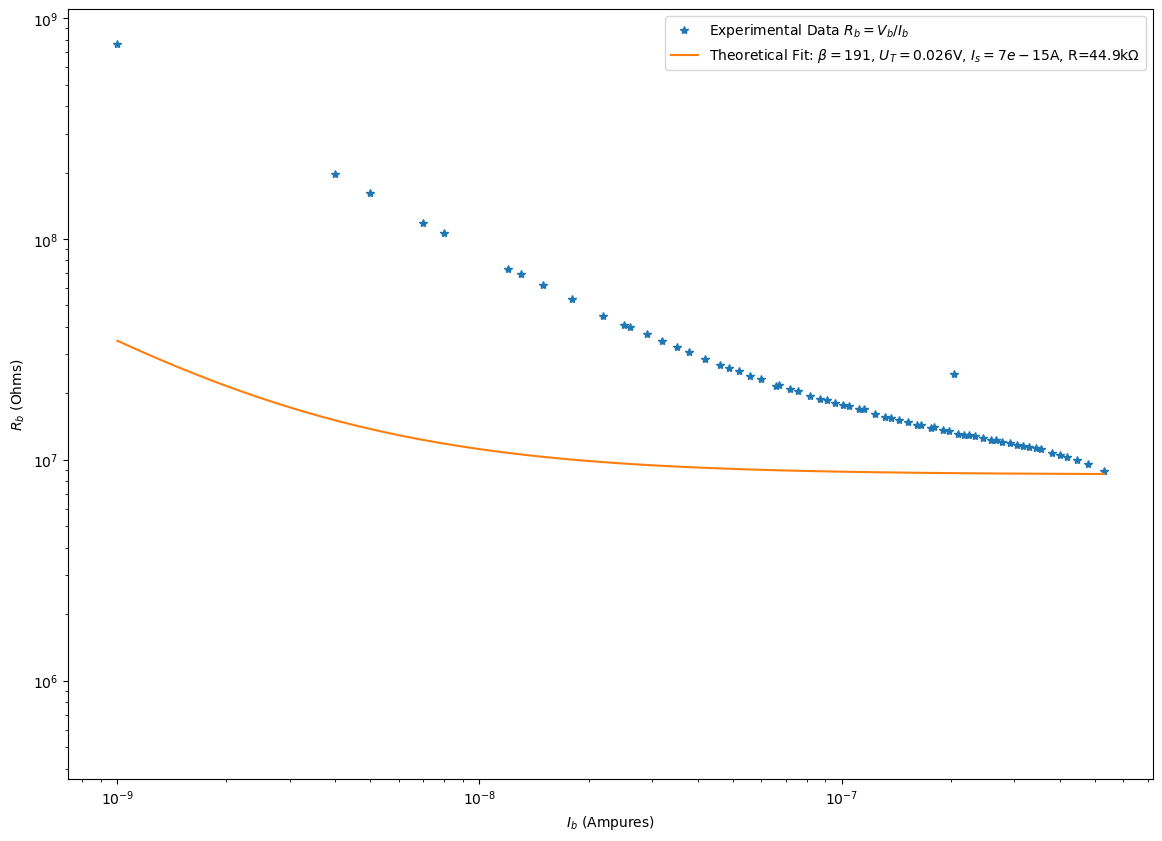

In [72]:
for r, df in exp2_data.items():
    i_b = np.abs(df["current_base"])
    v_b = np.abs(df["voltage_base"])

    R_b = v_b / i_b
    R_b = R_b.to_numpy()

    res = exp2_res_map[r]
    start = np.min(i_b)
    end = np.max(i_b)

    i_b_theoretical = np.logspace(np.log10(start), np.log10(np.max(end)))

    R_b_theoretical = u_t/i_b_theoretical + beta*res

    plt.figure(figsize=(14,10))
    plt.loglog()

    plt.plot(df["current_base"], R_b, "*", label="Experimental Data $R_b = V_b/I_b$")
    plt.plot(i_b_theoretical, R_b_theoretical, label=f"Theoretical Fit: $\\beta={beta}$, $U_T={u_t:0.3f}$V, $I_s={i_s}$A, R={r}$\Omega$")

    plt.xlabel("$I_b$ (Ampures)")
    plt.ylabel("$R_b$ (Ohms)")

    plt.legend()
    plt.show()
    plt.close()
    pass